In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from sklearn import datasets, decomposition
%matplotlib inline

In [2]:
dataset = datasets.fetch_lfw_people()

In [3]:
dataset.data.shape

(13233, 2914)

In [4]:
dataset.images.shape

(13233, 62, 47)

In [5]:
print(len(dataset.target), len(dataset.target_names))

13233 5749


In [6]:
dataset.target[0]

5360

In [7]:
print(dataset.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

Zurab Tsereteli's image as an example

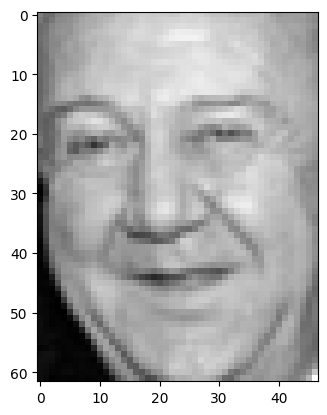

In [8]:
plt.imshow(dataset.images[11], cmap='gray')

In [9]:
max_components = 1000
pca = decomposition.PCA(n_components=max_components)
data = pca.fit_transform(dataset.data)

In [10]:
loss = []
components = np.arange(1, max_components)

In [11]:
for components_num in components:
    data_comp = data[:, :components_num]
    loss.append(np.linalg.norm(dataset.data - data_comp @ pca.components_[:components_num]))

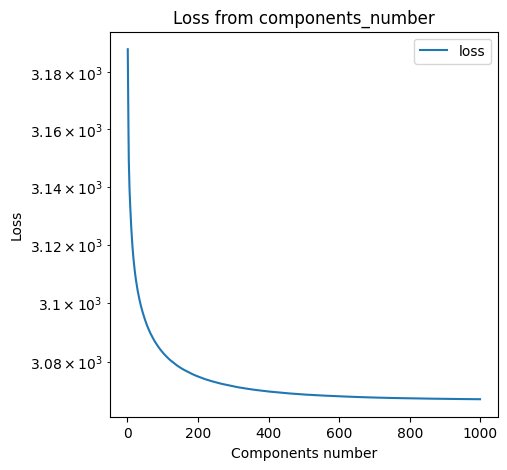

In [12]:
plt.figure(figsize=(5, 5))
plt.plot(components, loss, label="loss")
plt.title("Loss from components_number")
plt.xlabel("Components number")
plt.ylabel("Loss")
plt.legend()
plt.yscale('log')

Let's do the same with just SVD

In [13]:
tensor_images = tf.convert_to_tensor(dataset.data)

In [14]:
s, u, v = tf.linalg.svd(tensor_images, full_matrices=True)
s

<tf.Tensor: shape=(2914,), dtype=float32, numpy=
array([3.1107036e+03, 3.2123758e+02, 2.8143112e+02, ..., 1.4092910e-01,
       1.3478009e-01, 1.2761341e-01], dtype=float32)>

In [20]:
sz = min(dataset.data.shape)
h = dataset.images.shape[1]
w = dataset.images.shape[2]

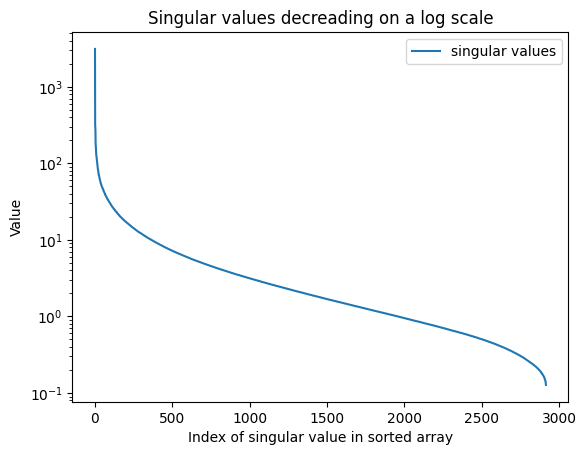

In [21]:
plt.plot(np.arange(1, sz + 1, 1), s, label="singular values")
plt.yscale("log")

plt.xlabel("Index of singular value in sorted array")
plt.ylabel("Value")
plt.title("Singular values decreading on a log scale")

plt.legend()
plt.show()

In [22]:
components_numbers = [1, 2, 5, 10, 15, 30, 75, 100, 800, sz]

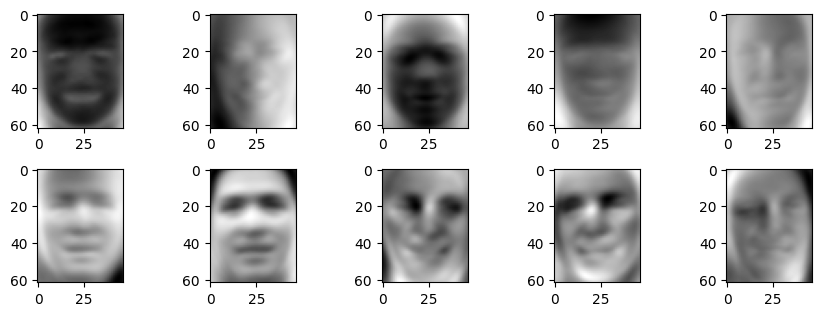

In [23]:
fig, axes = plt.subplots(2, 5, gridspec_kw=dict(hspace=0.01, wspace=1), figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(h, w),cmap="gray")

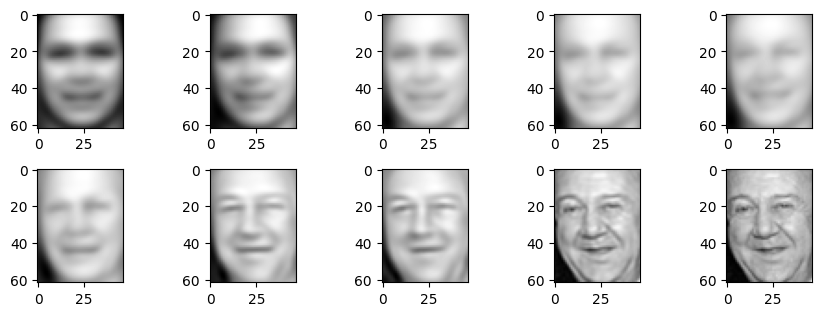

In [24]:
fig, axes = plt.subplots(2, 5, gridspec_kw=dict(hspace=0.01, wspace=1), figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    components_num = components_numbers[i]
    u_comp = tf.slice(u, [0, 0], [-1, components_num])
    v_comp = tf.slice(v, [0, 0], [-1, components_num])
    s_comp = tf.slice(s, [0], [components_num])
    compressed_images = np.array(u_comp[:, :] @ tf.linalg.diag(s_comp) @ tf.transpose(v_comp[:, :]))
    if (compressed_images.min() < 0):
        compressed_images -= compressed_images.min()
    if (compressed_images.max() > 1):
        compressed_images /= compressed_images.max()
    
    ax.imshow(compressed_images[11].reshape(h, w),cmap="gray")